## 2448501
## A ANTO KELVIN PRABHU

## Qustion 1
### the Toffoli Gate with Superposition
This circuit demonstrates how a Toffoli or Controlled Control Not (CCX) gate behaves when one of its control qubits is in a superposition.
###### Step 1: Initialization & Superposition
- The circuit starts with the qubits in the state |000⟩.
- A Hadamard (H) gate is applied to q0, putting it into an equal superposition of |0⟩ and |1⟩. The system's state becomes: (1/√2)(|000⟩ + |100⟩).
###### Step 2: The Controlled-Controlled-NOT (Toffoli Gate)
- The ccx gate uses q0 and q1 as control qubits and q2 as the target.
- It flips the target q2 only if both q0 and q1 are in the |1⟩ state.
- We analyze its effect on our superposition:
- For the |000⟩ part: The controls are q0=|0⟩ and q1=|0⟩. The condition is not met, so nothing happens. The state remains |000⟩.
- For the |100⟩ part: The controls are q0=|1⟩ and q1=|0⟩. The condition is still not met (both must be |1⟩), so nothing happens. The state remains |100⟩.



### Final State

- Since the Toffoli gate's conditions were not met for either part of the superposition (assuming the initial state was |000⟩), the final state is an entangled state identical to the one after the Hadamard gate: (1/√2)(|000⟩ + |100⟩).

- we would observe the state 000 50% of the time and 100 50% of the time. The circuit effectively creates entanglement between q0 and the other qubits.

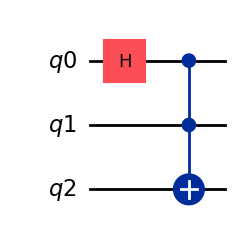

In [47]:
# Q1 Circuit 1
from qiskit import QuantumCircuit,QuantumRegister
from qiskit.visualization import plot_circuit_layout,plot_histogram

q0 = QuantumRegister(1,"q0")
q1 = QuantumRegister(1,"q1")
q2 = QuantumRegister(1,"q2")
circuit = QuantumCircuit(q0,q1,q2)
circuit.h(q0[0])
# controlled not gate
# circuit.cx(q1[0], q2[0])
circuit.ccx(q0[0],q1[0],q2[0])
display(circuit.draw(output='mpl'))

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


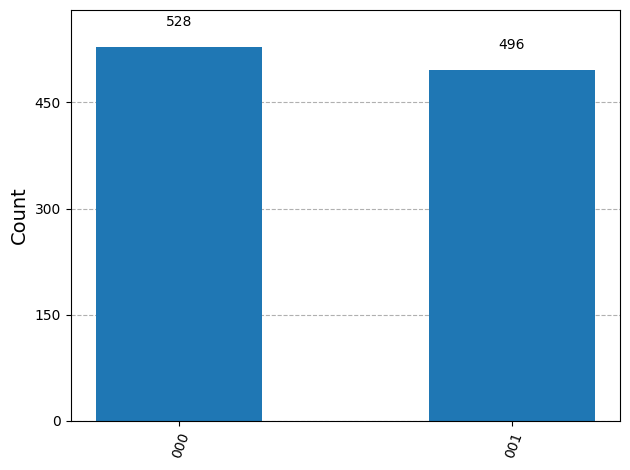

In [48]:
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler as Sampler

# Add measurements to the circuit
circuit.measure_all()

results = Sampler().run([circuit]).result()
print(results)
statistics = results[0].data.meas.get_counts()
display(plot_histogram(statistics))

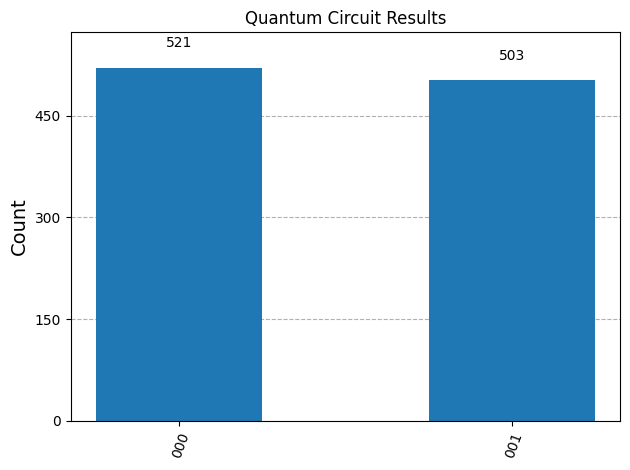

In [49]:
# To simulate:
sim = AerSimulator()
result = sim.run(circuit, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts, title="Quantum Circuit Results")

--- Test Case for Input |000⟩ ---


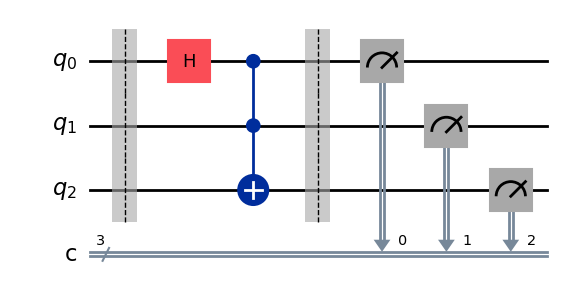

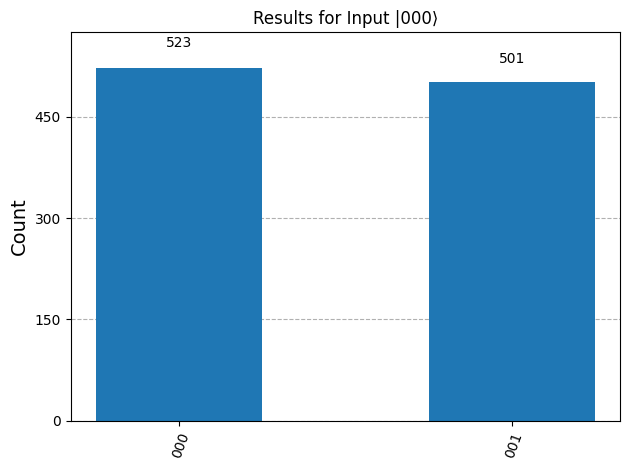



--- Test Case for Input |001⟩ ---


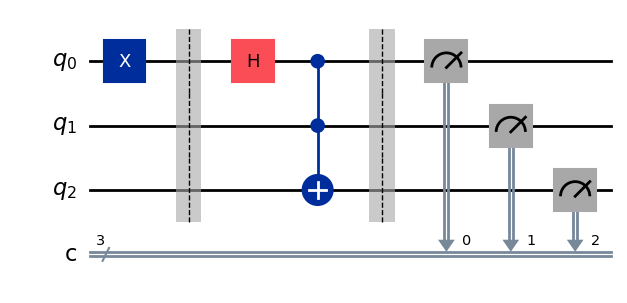

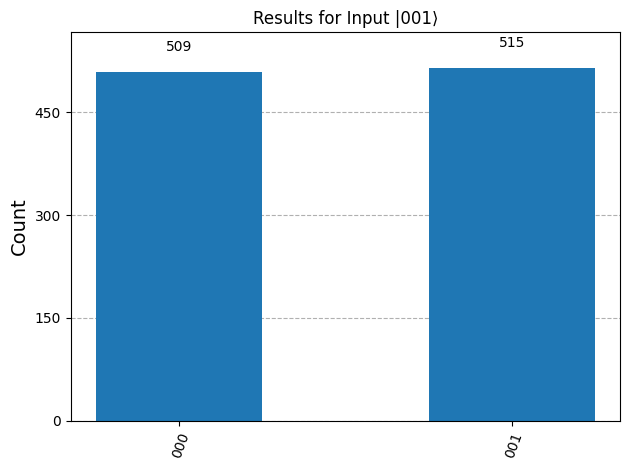



--- Test Case for Input |010⟩ ---


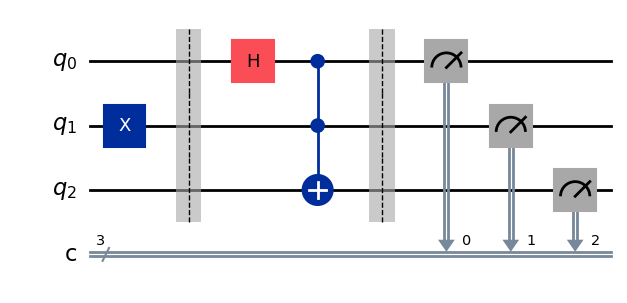

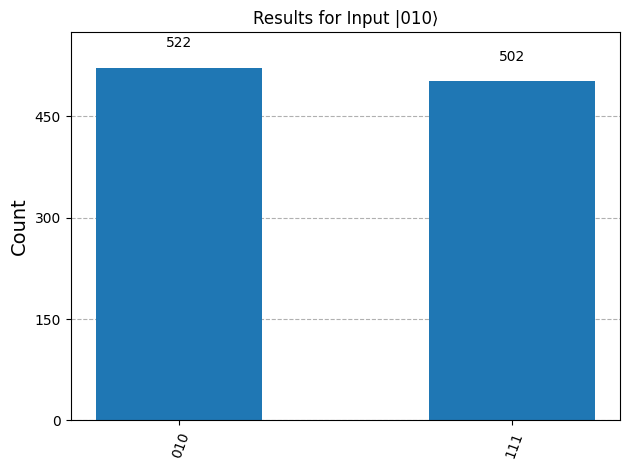



--- Test Case for Input |011⟩ ---


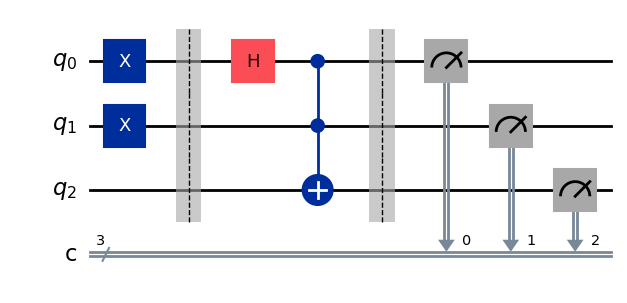

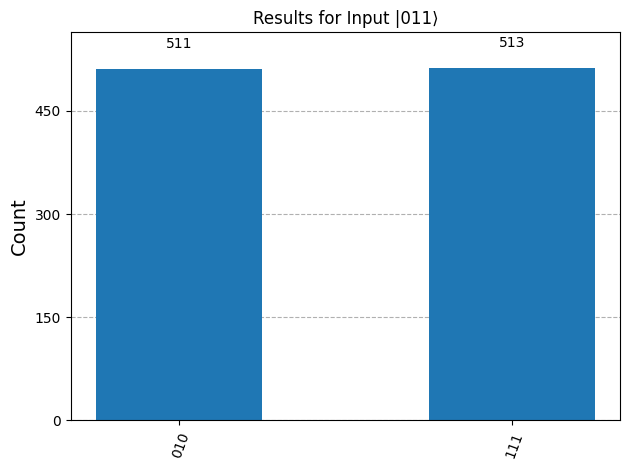

In [51]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Define the core logic of your circuit
def create_core_circuit():
    q = QuantumRegister(3, 'q')
    core_circ = QuantumCircuit(q, name="Core Circuit")
    core_circ.h(q[0])
    core_circ.ccx(q[0], q[1], q[2])
    return core_circ

# Get the simulator
simulator = Aer.get_backend('qasm_simulator')
# Get the simulator
simulator = AerSimulator()
for i in range(4):
    # Determine the initial state from the integer i (e.g., 5 -> '101')
    initial_state = f'{i:03b}' # Format as a 3-bit binary string

    # Create a new circuit for this specific test case
    q = QuantumRegister(3, 'q')
    c = ClassicalRegister(3, 'c')
    test_circuit = QuantumCircuit(q, c)

    # 1. Initialize the state by applying X gates
    # We reverse the string because Qiskit orders qubits q2, q1, q0
    for qubit_index, bit in enumerate(reversed(initial_state)):
        if bit == '1':
            test_circuit.x(qubit_index)
    test_circuit.barrier()

    # 2. Apply your core circuit
    core_logic = create_core_circuit()
    test_circuit = test_circuit.compose(core_logic)
    test_circuit.barrier()
    # Add a separator barrier for visualization
    # 3. Measure the qubits
    test_circuit.measure(q, c)

    # --- Simulation and Visualization ---
    result = simulator.run(test_circuit, shots=1024).result()
    counts = result.get_counts()
    print(f"--- Test Case for Input |{initial_state}⟩ ---")
    display(test_circuit.draw(output='mpl'))
    display(plot_histogram(counts, title=f"Results for Input |{initial_state}⟩"))
    print("\n" + "="*50 + "\n")



# Question 2

### the Controlled-SWAP Circuit
This circuit demonstrates how a control qubit in a superposition can create a complex entangled state using a Controlled-SWAP (Fredkin) gate.

##### Step 1: Initialization & Superposition

- The circuit starts in the state |000⟩.
A Hadamard (H) gate is applied to q0, putting it into a superposition. The state becomes (1/√2)(|000⟩ + |100⟩).
##### Step 2: State Preparation

- An X gate flips q2 to |1⟩. The state is now (1/√2)(|001⟩ + |101⟩).
##### Step 3: The Controlled-SWAP (Fredkin Gate)

- The cswap gate uses q0 as its control. It swaps the target qubits (q1 and q2) only if q0 is |1⟩.
For the |001⟩ part of the superposition, q0 is |0⟩, so nothing happens. The state remains |001⟩.
For the |101⟩ part of the superposition, q0 is |1⟩, so the gate swaps q1 (|0⟩) and q2 (|1⟩). This part becomes |110⟩.
Final State

- The final state is an entangled superposition of the two outcomes: (1/√2)(|001⟩ + |110⟩).
Upon measurement, we will observe the state 001 50% of the time and 110 50% of the time, with no other possible results.


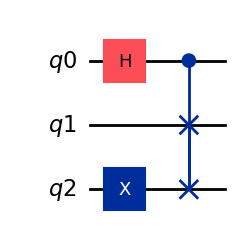

In [43]:
# Q2 Circuit 2
from qiskit import QuantumCircuit,QuantumRegister
from qiskit.visualization import plot_circuit_layout,plot_histogram
q0 = QuantumRegister(1,"q0")
q1 = QuantumRegister(1,"q1")
q2 = QuantumRegister(1,"q2")
circuit = QuantumCircuit(q0,q1,q2)
circuit.h(q0[0])
circuit.x(q2[0])
circuit.cswap(q0[0],q1[0], q2[0])
display(circuit.draw(output='mpl'))

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=3>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


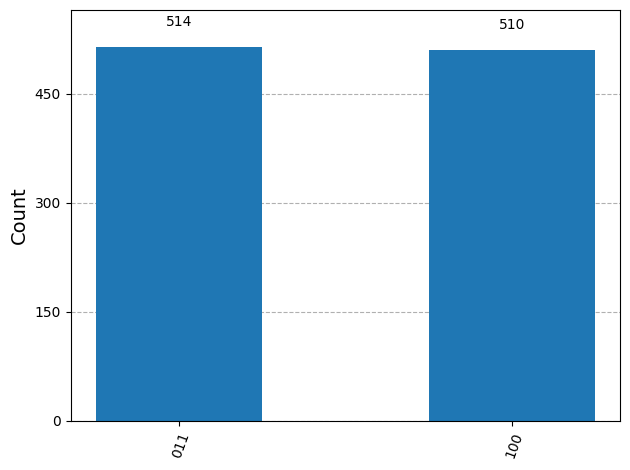

In [44]:
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler as Sampler

# Add measurements to the circuit
circuit.measure_all()

results = Sampler().run([circuit]).result()
print(results)
statistics = results[0].data.meas.get_counts()
display(plot_histogram(statistics))


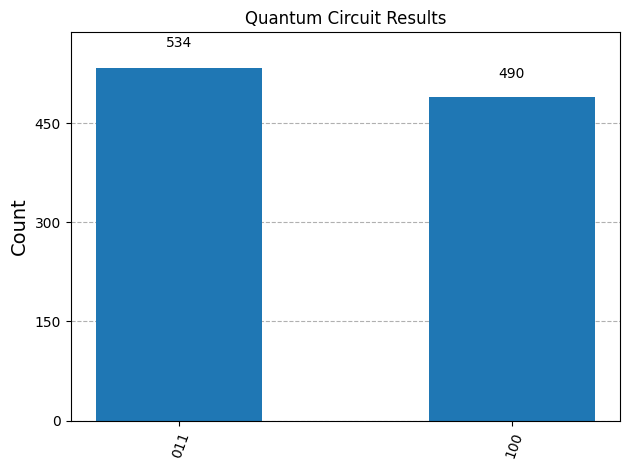

In [45]:
# To simulate:
sim = AerSimulator()
result = sim.run(circuit, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts, title="Quantum Circuit Results")

--- Test Case for Input |000⟩ ---


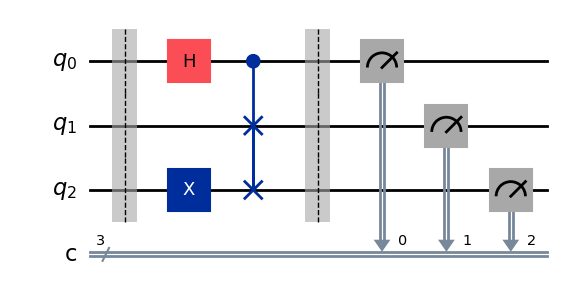

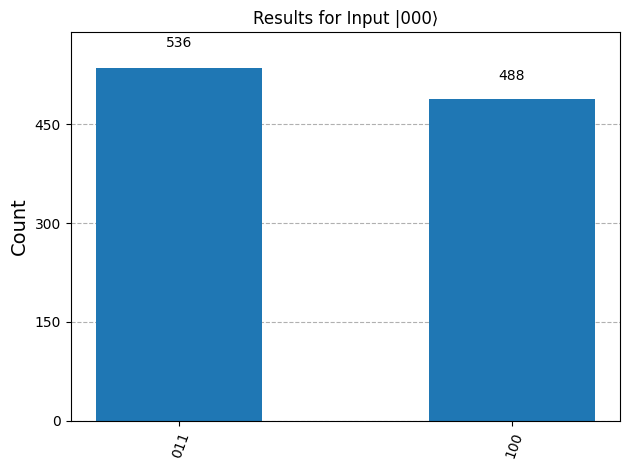



--- Test Case for Input |001⟩ ---


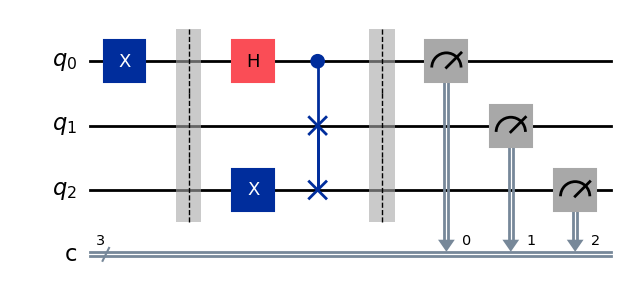

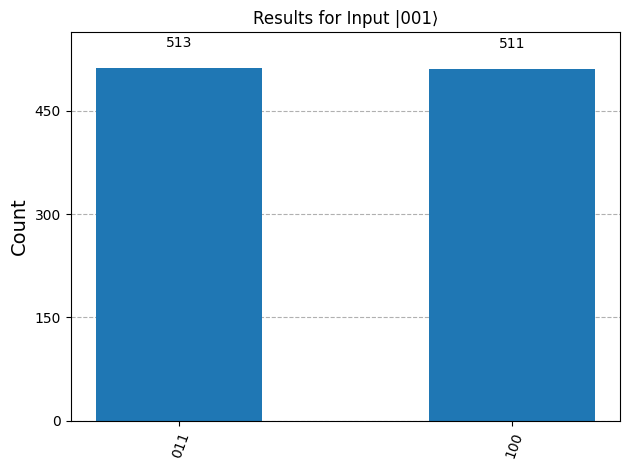



--- Test Case for Input |010⟩ ---


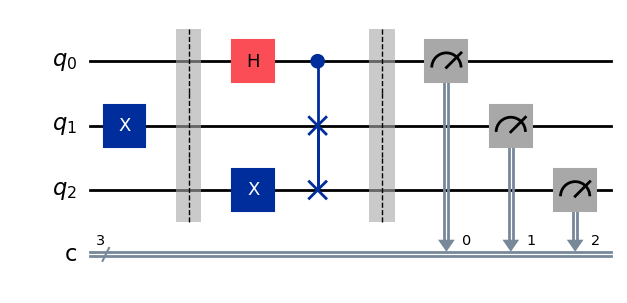

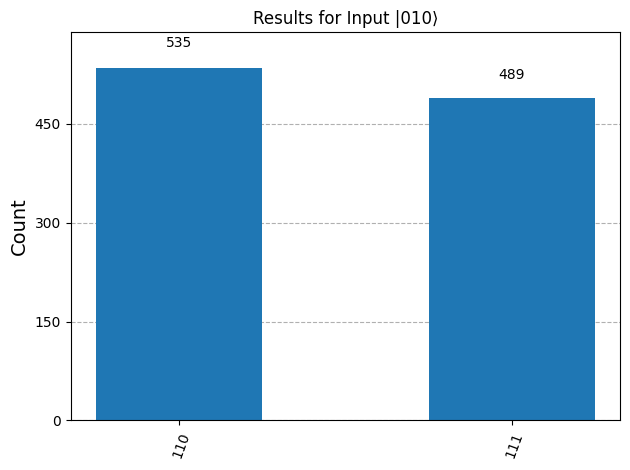



--- Test Case for Input |011⟩ ---


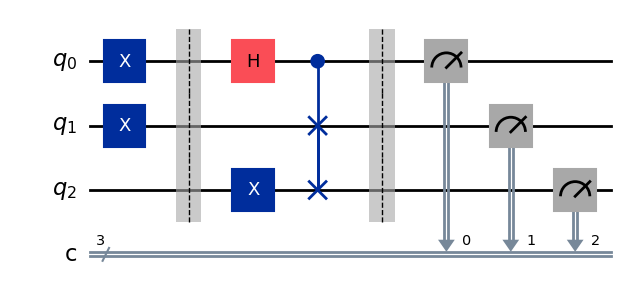

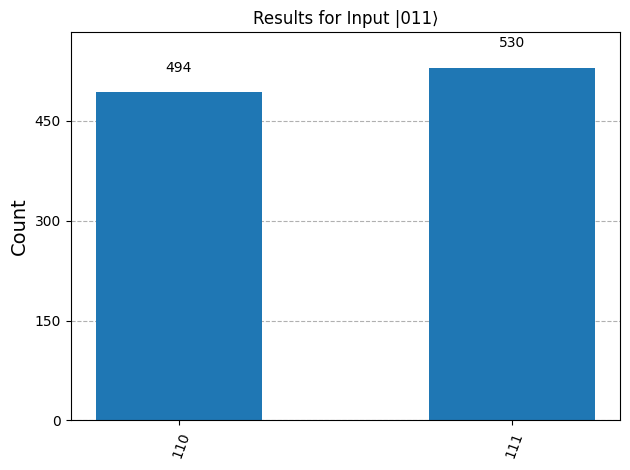

In [52]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Define the core logic of your circuit
def create_core_circuit():
    q = QuantumRegister(3, 'q')
    core_circ = QuantumCircuit(q, name="Core Circuit")
    core_circ.h(q[0])
    core_circ.x(q[2])
    core_circ.cswap(q[0], q[1], q[2])
    return core_circ

# Get the simulator
simulator = Aer.get_backend('qasm_simulator')
# Get the simulator
simulator = AerSimulator()
for i in range(4):
    # Determine the initial state from the integer i (e.g., 5 -> '101')
    initial_state = f'{i:03b}' # Format as a 3-bit binary string

    # Create a new circuit for this specific test case
    q = QuantumRegister(3, 'q')
    c = ClassicalRegister(3, 'c')
    test_circuit = QuantumCircuit(q, c)

    # 1. Initialize the state by applying X gates
    # We reverse the string because Qiskit orders qubits q2, q1, q0
    for qubit_index, bit in enumerate(reversed(initial_state)):
        if bit == '1':
            test_circuit.x(qubit_index)
    test_circuit.barrier()

    # 2. Apply your core circuit
    core_logic = create_core_circuit()
    test_circuit = test_circuit.compose(core_logic)
    test_circuit.barrier()

    # 3. Measure the qubits
    test_circuit.measure(q, c)

    # --- Simulation and Visualization ---
    result = simulator.run(test_circuit, shots=1024).result()
    counts = result.get_counts()
    print(f"--- Test Case for Input |{initial_state}⟩ ---")
    display(test_circuit.draw(output='mpl'))
    display(plot_histogram(counts, title=f"Results for Input |{initial_state}⟩"))
    print("\n" + "="*50 + "\n")



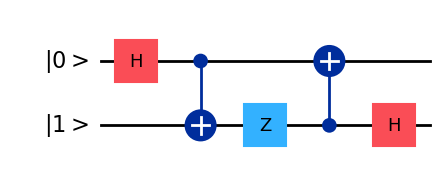

In [ ]:
# Q3 Circuit 3 - compute
# a)
q0 = QuantumRegister(1,"|0>")
q1 = QuantumRegister(1,"|1>")
circuit = QuantumCircuit(q0,q1)
circuit.h(q0[0])
circuit.cx(q0[0], q1[0])
circuit.z(q1[0])
circuit.cx(q1[0], q0[0])
circuit.h(q1[0])
display(circuit.draw(output='mpl'))




PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'shots': 1024, 'circuit_metadata': {}})], metadata={'version': 2})


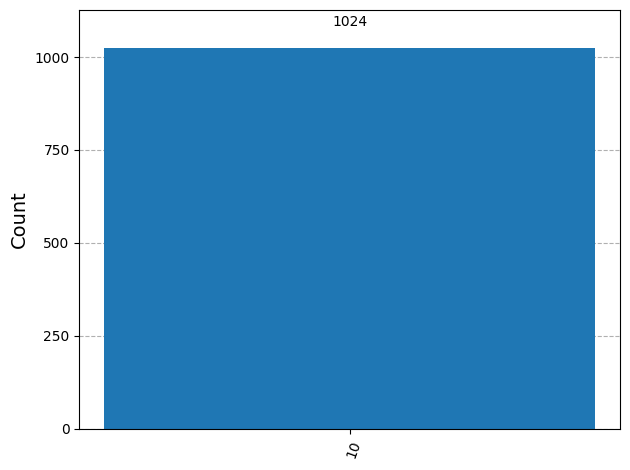

In [32]:
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorSampler as Sampler

# Add measurements to the circuit
circuit.measure_all()

results = Sampler().run([circuit]).result()
print(results)
statistics = results[0].data.meas.get_counts()
display(plot_histogram(statistics))

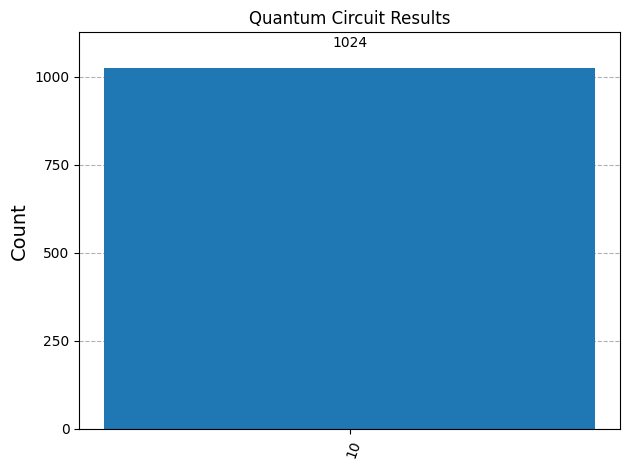

In [33]:
# To simulate:
sim = AerSimulator()
result = sim.run(circuit, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts, title="Quantum Circuit Results")

b) 

In [ ]:
# In the realm of quantum computing, the sequence in which operations are applied to qubits is of paramount importance. This principle, known as the non-commutativity of quantum gates, can be demonstrated by examining the composition of the Hadamard (H), Phase (S), and T gates.

# The Gates and Their Matrix Representations
# In quantum mechanics, single-qubit gates are represented by 2x2 unitary matrices. The matrices for the Hadamard, Phase, and T gates are as follows:

# Hadamard Gate (H): This gate creates a superposition of states.

# plaintext
# H = (1/√2) * [[1, 1],
#               [1, -1]]
# Phase Gate (S): This gate applies a phase shift of π/2 to the |1⟩ state. It is also known as the Z90 gate because it represents a 90-degree rotation around the z-axis.

# plaintext
# S = [[1, 0],
#      [0, i]]
# T Gate: This gate is a finer phase rotation, applying a phase shift of π/4 to the |1⟩ state.

# plaintext
# T = [[1, 0],
#      [0, e^(iπ/4)]]
# The Order of Operations Matters
# To illustrate the importance of the order of these gates, let's consider two distinct sequences of operations and calculate the resulting composite unitary matrix for each.

# Case 1: Applying T, then S, then H
# The combined operation is represented by the matrix product H * S * T.

# First, we calculate the product of S and T:

# plaintext
# S * T = [[1, 0], [0, i]] * [[1, 0], [0, e^(iπ/4)]]
#       = [[1, 0], [0, i * e^(iπ/4)]]
#       = [[1, 0], [0, e^(iπ/2) * e^(iπ/4)]]
#       = [[1, 0], [0, e^(i3π/4)]]
# Next, we multiply the result by H:

# plaintext
# H * (S * T) = (1/√2) * [[1, 1], [1, -1]] * [[1, 0], [0, e^(i3π/4)]]
#             = (1/√2) * [[1, e^(i3π/4)], [1, -e^(i3π/4)]]
# Substituting the value of e^(i3π/4) = (-1+i)/√2, we get:

# plaintext
# H * S * T = (1/√2) * [[1, (-1+i)/√2], [1, -(-1+i)/√2]]
#           = [[1/√2, (-1+i)/2], [1/√2, (1-i)/2]]
# Case 2: Applying H, then S, then T
# This sequence is represented by the matrix product T * S * H.

# First, we calculate the product of S and H:

# plaintext
# S * H = [[1, 0], [0, i]] * (1/√2) * [[1, 1], [1, -1]]
#       = (1/√2) * [[1, 1], [i, -i]]
# Next, we multiply the result by T:

# plaintext
# T * (S * H) = [[1, 0], [0, e^(iπ/4)]] * (1/√2) * [[1, 1], [i, -i]]
#             = (1/√2) * [[1, 1], [i * e^(iπ/4), -i * e^(iπ/4)]]
# Substituting the value of i * e^(iπ/4) = e^(iπ/2) * e^(iπ/4) = e^(i3π/4) = (-1+i)/√2, we get:

# plaintext
# T * S * H = (1/√2) * [[1, 1], [(-1+i)/√2, -(-1+i)/√2]]
#           = [[1/√2, 1/√2], [(-1+i)/2, (1-i)/2]]
# Conclusion
# By comparing the resulting matrices from the two cases:

# H * S * T = [[1/√2, (-1+i)/2], [1/√2, (1-i)/2]]
# T * S * H = [[1/√2, 1/√2], [(-1+i)/2, (1-i)/2]]
# It is evident that H * S * T ≠ T * S * H. This inequality serves as a definitive proof that the order of unitary composition is crucial in quantum operations. Swapping the order of the Hadamard, Phase, and T gates leads to a different overall transformation, which would, in turn, produce a different final quantum state if applied to a qubit. This non-commutative nature is a fundamental aspect of quantum circuit design and algorithm development.